# Students Performance Score Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('student_performance_dataset.csv')
df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


# Perform EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB


In [6]:
df.shape

(708, 10)

In [7]:

df.select_dtypes(include = ['number']).corr()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
Study_Hours_per_Week,1.000000,-0.008150,-0.014756,0.370387
Attendance_Rate,-0.008150,1.000000,0.000412,0.460478
Past_Exam_Scores,-0.014756,0.000412,1.000000,0.489516
Final_Exam_Score,0.370387,0.460478,0.489516,1.000000


In [8]:
df.describe()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
count,708.000000,708.000000,708.000000,708.000000
mean,26.132768,78.107722,77.871469,58.771186
std,8.877727,13.802802,14.402739,6.705877
min,10.000000,50.116970,50.000000,50.000000
25%,19.000000,67.550094,65.000000,52.000000
50%,27.000000,79.363046,79.000000,59.500000
75%,34.000000,89.504232,91.000000,64.000000
max,39.000000,99.967675,100.000000,77.000000


In [9]:
for col in df:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Student_ID                  708 non-null    category
 1   Gender                      708 non-null    category
 2   Study_Hours_per_Week        708 non-null    int64   
 3   Attendance_Rate             708 non-null    float64 
 4   Past_Exam_Scores            708 non-null    int64   
 5   Parental_Education_Level    708 non-null    category
 6   Internet_Access_at_Home     708 non-null    category
 7   Extracurricular_Activities  708 non-null    category
 8   Final_Exam_Score            708 non-null    int64   
 9   Pass_Fail                   708 non-null    category
dtypes: category(6), float64(1), int64(3)
memory usage: 47.8 KB


In [10]:
df.isnull().mean()

Student_ID                    0.0
Gender                        0.0
Study_Hours_per_Week          0.0
Attendance_Rate               0.0
Past_Exam_Scores              0.0
Parental_Education_Level      0.0
Internet_Access_at_Home       0.0
Extracurricular_Activities    0.0
Final_Exam_Score              0.0
Pass_Fail                     0.0
dtype: float64

<Axes: >

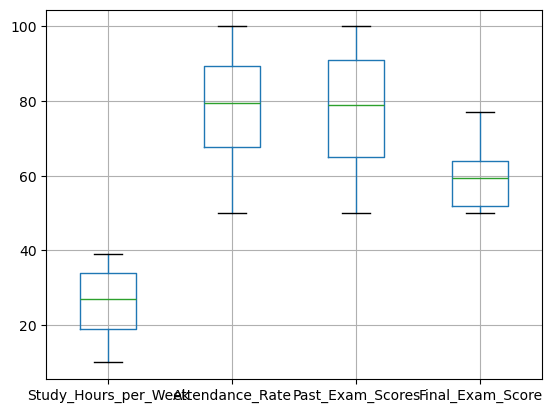

In [11]:
df.boxplot()

In [12]:
category_cols = []
numerical_cols = []

for col in df:
    if df[col].dtype == 'category':
        category_cols.append(col)
    else:
        numerical_cols.append(col)

print(category_cols)
print(numerical_cols)



['Student_ID', 'Gender', 'Parental_Education_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities', 'Pass_Fail']
['Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores', 'Final_Exam_Score']


## Checking the skewness of the numerical cols : Univariate Analysis

C:\Users\fatim\AppData\Local\Temp\ipykernel_13768\1939030530.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


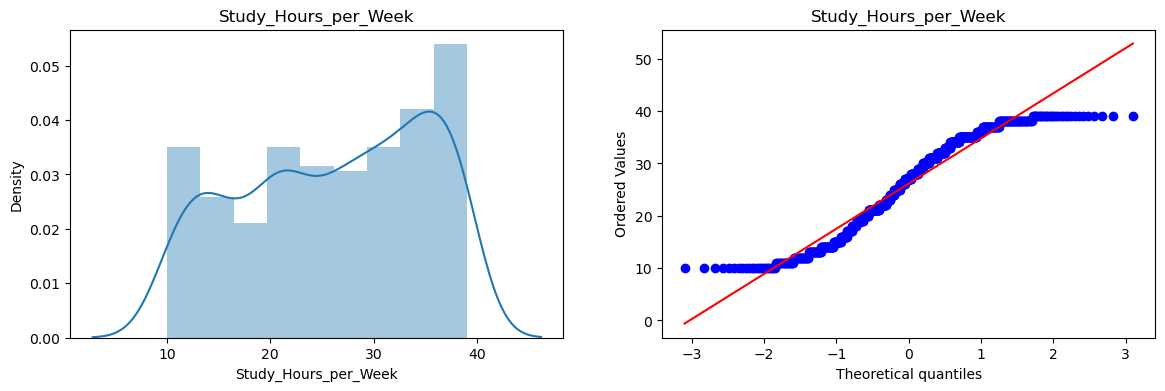

C:\Users\fatim\AppData\Local\Temp\ipykernel_13768\1939030530.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


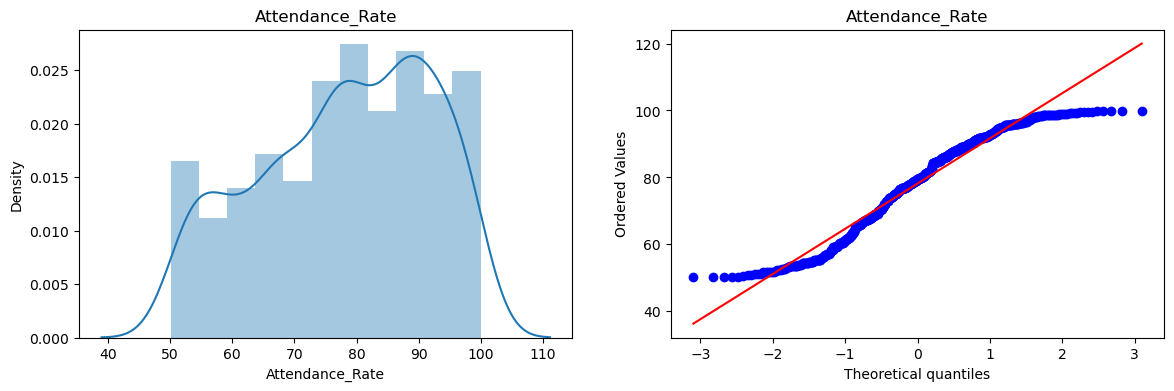

C:\Users\fatim\AppData\Local\Temp\ipykernel_13768\1939030530.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


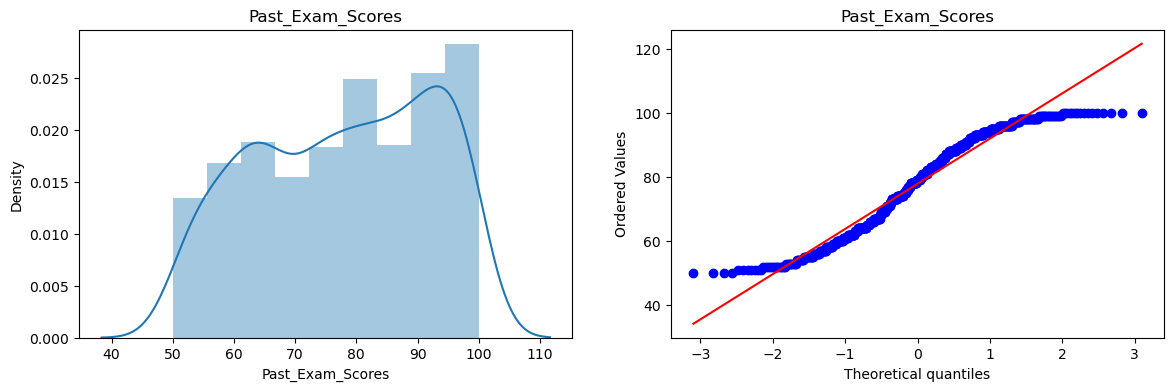

In [14]:
import scipy.stats as stats

for col in ['Study_Hours_per_Week' , 'Attendance_Rate' , 'Past_Exam_Scores']:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

#### All the Numerical Columns are Left skewed

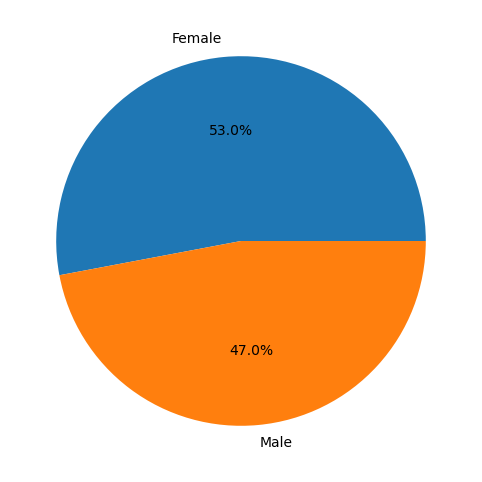

In [16]:

n = df['Gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(
    n,
    labels = n.index,
    autopct = '%1.1f%%'
    
)


plt.show()

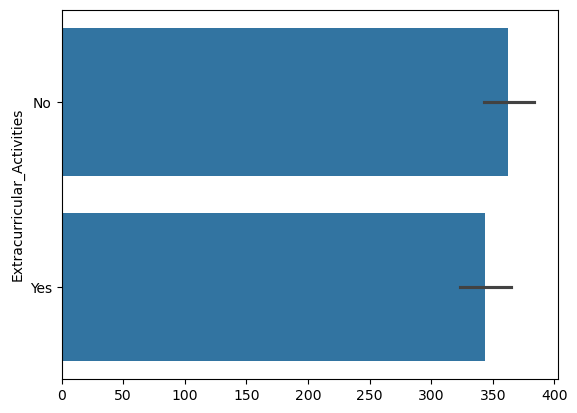

In [17]:

sns.barplot(df['Extracurricular_Activities'])
plt.show()

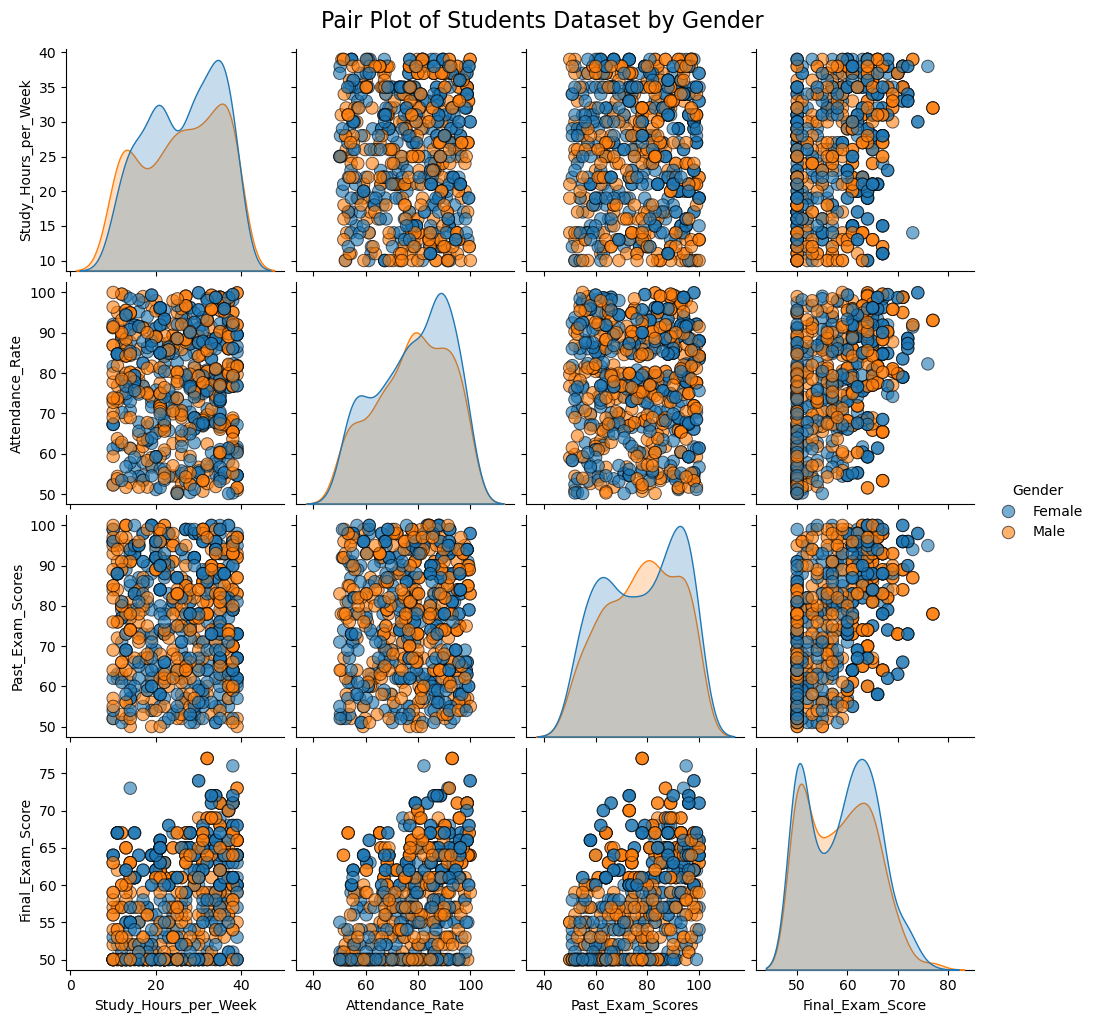

In [18]:
# Example with customizations
sns.pairplot(df, 
             hue='Gender', 
             diag_kind='kde', 
             kind='scatter', 
             height=2.5,
             plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}) 

plt.suptitle('Pair Plot of Students Dataset by Gender', y=1.02, fontsize=16) 
plt.show()


In [19]:
category_cols

['Student_ID',
 'Gender',
 'Parental_Education_Level',
 'Internet_Access_at_Home',
 'Extracurricular_Activities',
 'Pass_Fail']

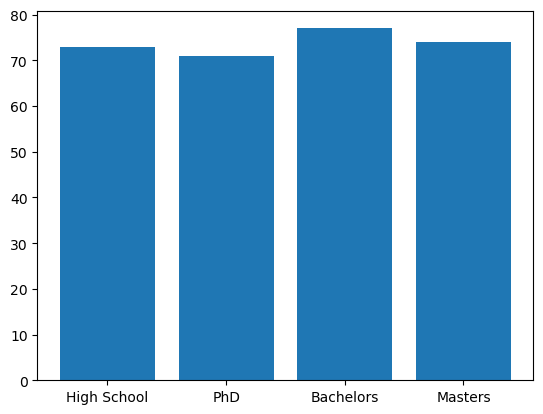

In [20]:
plt.bar(
    df['Parental_Education_Level'],
    df['Final_Exam_Score']
)

plt.show()

In [21]:
# Pattern: ([Letter part]) followed by ([Number part])
df[['Title', 'ID']] = df['Student_ID'].str.extract(r'([A-Z]+)(\d+)')
df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail,Title,ID
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass,S,147
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail,S,136
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail,S,209
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass,S,458
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass,S,078


In [22]:
df.drop(columns = ['Pass_Fail' , 'Student_ID'],inplace = True)
df.dropna()

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Title,ID
0,Male,31,68.267841,86,High School,Yes,Yes,63,S,147
1,Male,16,78.222927,73,PhD,No,No,50,S,136
2,Female,21,87.525096,74,PhD,Yes,No,55,S,209
3,Female,27,92.076483,99,Bachelors,No,No,65,S,458
4,Female,37,98.655517,63,Masters,No,Yes,70,S,078
...,...,...,...,...,...,...,...,...,...,...
703,Male,14,84.658761,78,PhD,Yes,No,50,S,492
704,Male,35,60.278990,83,Masters,No,No,62,S,301
705,Male,25,98.384969,75,Bachelors,Yes,No,57,S,473
706,Female,21,96.148012,84,Bachelors,Yes,No,65,S,307


In [23]:
df.head()

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Title,ID
0,Male,31,68.267841,86,High School,Yes,Yes,63,S,147
1,Male,16,78.222927,73,PhD,No,No,50,S,136
2,Female,21,87.525096,74,PhD,Yes,No,55,S,209
3,Female,27,92.076483,99,Bachelors,No,No,65,S,458
4,Female,37,98.655517,63,Masters,No,Yes,70,S,078


## Split Data

In [25]:
from sklearn.model_selection import train_test_split


x = df.drop(columns = ['Final_Exam_Score'])
y  = df['Final_Exam_Score']

x_train , x_test , y_train , y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    random_state  = 45
)

x_train.shape , x_test.shape


((566, 9), (142, 9))

## Data Preprocessing

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , OneHotEncoder , OrdinalEncoder , FunctionTransformer , KBinsDiscretizer  ,   PolynomialFeatures

binning = KBinsDiscretizer(n_bins = 5 , strategy = 'quantile' , encode = 'ordinal')
onehot = OneHotEncoder(drop = 'first' , sparse_output = False , handle_unknown = 'ignore')
ordinal = OrdinalEncoder(categories = [['High School' ,'Bachelors' , 'Masters' , 'PhD']])
scale = StandardScaler()
power_trans = FunctionTransformer(np.sqrt , feature_names_out = 'one-to-one')



numerical_pipeline  =  Pipeline([
    ('Scaler' , StandardScaler()),
    ('poly' , PolynomialFeatures(degree = 2))
])

ordinal_pipeline = Pipeline([
    ('oe' , ordinal)
])


nominal_pipeline = Pipeline([
    ('ohe' , onehot)
])


x_train.head()


,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Title,ID
306,Female,29,68.864298,92,High School,No,No,S,097
639,Male,20,95.393307,54,PhD,No,Yes,S,215
449,Male,37,88.987939,74,Bachelors,Yes,Yes,S,400
423,Male,36,67.219187,69,Masters,No,No,S,464
585,Male,37,88.987939,74,Bachelors,Yes,Yes,S,400


# Column Tranformation

In [28]:
numerical_cols = ['Study_Hours_per_Week' ,  'Attendance_Rate' , 'Past_Exam_Scores']

preprocessor = ColumnTransformer([
    ('num' ,numerical_pipeline , numerical_cols),
    ('ord' , ordinal_pipeline , ['Parental_Education_Level']),
    ('nom' , nominal_pipeline , ['Extracurricular_Activities' ,'Internet_Access_at_Home' , 'Gender' ])
    
])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('Scaler', StandardScaler()),
                                                 ('poly',
                                                  PolynomialFeatures())]),
                                 ['Study_Hours_per_Week', 'Attendance_Rate',
                                  'Past_Exam_Scores']),
                                ('ord',
                                 Pipeline(steps=[('oe',
                                                  OrdinalEncoder(categories=[['High '
                                                                              'School',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'PhD']]))]),
                                 ['Parental_Education_Level']),
                                ('nom',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Extracurricular_Activities',
                                  'Internet_Access_at_Home', 'Gender'])])

# Model Pipeline

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge


model = Pipeline([
    ('prepro' , preprocessor),
    ('ridge' , Ridge(alpha= 0.1))
])
model



Pipeline(steps=[('prepro',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures())]),
                                                  ['Study_Hours_per_Week',
                                                   'Attendance_Rate',
                                                   'Past_Exam_Scores']),
                                                 ('ord',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder(categories=[['High '
                                                                                               'School',
                                                                                               'Bachelors',
                                                                                               'Masters',
                                                                                               'PhD']]))]),
                                                  ['Parental_Education_Level']),
                                                 ('nom',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Extracurricular_Activities',
                                                   'Internet_Access_at_Home',
                                                   'Gender'])])),
                ('ridge', Ridge(alpha=0.1))])

# Training 

In [30]:
model.fit(x_train , y_train)

Pipeline(steps=[('prepro',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures())]),
                                                  ['Study_Hours_per_Week',
                                                   'Attendance_Rate',
                                                   'Past_Exam_Scores']),
                                                 ('ord',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder(categories=[['High '
                                                                                               'School',
                                                                                               'Bachelors',
                                                                                               'Masters',
                                                                                               'PhD']]))]),
                                                  ['Parental_Education_Level']),
                                                 ('nom',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Extracurricular_Activities',
                                                   'Internet_Access_at_Home',
                                                   'Gender'])])),
                ('ridge', Ridge(alpha=0.1))])

# Evaluation

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse, r2



(4.053656372914352, 0.6267902646282814)

# Prediction on new data

In [67]:
new_data = pd.DataFrame({
    'Study_Hours_per_Week' : [50],
     'Attendance_Rate' : [15],
    'Past_Exam_Scores' : [100],
    'Parental_Education_Level' : ['Bachelors'],
    'Extracurricular_Activities': ['No'],
    'Internet_Access_at_Home' : ['Yes'],
    'Gender' : ['Female']
    
})
new_data.head()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Extracurricular_Activities,Internet_Access_at_Home,Gender
0,50,15,100,Bachelors,No,Yes,Female


In [69]:
prediction = model.predict(new_data)
prediction[0]

60.55477344619141

In [78]:
model.named_steps['ridge'].coef_

array([ 0.        ,  2.66266888,  3.08993511,  3.38561164,  0.62897509,
        0.07183827,  0.25441911,  0.05768233,  0.18122411,  0.07419113,
        0.09864196,  0.67227586, -0.45196136, -0.17955228])

## Student Performance Score Prediction Project: Predicts a student’s final exam score based on their study habits, attendance, past scores, and other preparation-related inputs.